In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [2]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## Mission 1 모든 속성들을 수치형 데이터로 변환

### Categorical attribute를 Numerical attribute로 변환

df.map 함수를 사용해서 각각의 데이터들을 유니크한 값으로 매핑

vhigh를 2, high를 1, med를 0, low 를 -1로 매핑

In [3]:
df['buying'] =  df['buying'].map({'vhigh': 2,'high' : 1, 'med' : 0, 'low' : -1})

In [4]:
df['maint'] =  df['maint'].map({'vhigh': 2,'high' : 1, 'med' : 0, 'low' : -1})

high를 1, med를 0, low를 -1로 매핑

In [5]:
df['safety'] =  df['safety'].map({'high' : 1, 'med' : 0, 'low' : -1})

사람수를 매핑, more의 경우를 5 로 매핑

In [6]:
df['persons'] =  df['persons'].map({'2': 2, '4': 4,'more' : 5})

5more를 5로 매핑

In [7]:
df['doors'] =  df['doors'].map({'2': 2,'3' : 3 ,'4': 4,'5more' : 5})

small을 -1, med를 0, big 을 1로 매핑

In [8]:
df['log_boot'] =  df['log_boot'].map({'small' : -1, 'med' : 0, 'big' : 1})

unacc을 0, acc을 1 good을 2 vgood을 3으로 매핑

In [9]:
df['eval'] = df['eval'].map({'unacc' : 0, 'acc' : 1, 'good' : 2, 'vgood' : 3})

In [91]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.500000,0.500000,3.500000,3.666667,0.000000,0.000000,0.414931
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733,0.740700
min,-1.000000,-1.000000,2.000000,2.000000,-1.000000,-1.000000,0.000000
25%,-0.250000,-0.250000,2.750000,2.000000,-1.000000,-1.000000,0.000000
50%,0.500000,0.500000,3.500000,4.000000,0.000000,0.000000,0.000000
75%,1.250000,1.250000,4.250000,5.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,5.000000,5.000000,1.000000,1.000000,3.000000


## Mission 2

### Target별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출

In [11]:
target_groupDF = df.groupby('eval')

In [12]:
 target_groupDF.describe()

buying        doors     log_boot        maint      persons  \
eval                                                                          
0    count  1210.000000  1210.000000  1210.000000  1210.000000  1210.000000   
     mean      0.649587     3.454545    -0.067769     0.633058     3.314050   
     std       1.118099     1.127152     0.819754     1.127547     1.304272   
     min      -1.000000     2.000000    -1.000000    -1.000000     2.000000   
     25%       0.000000     2.000000    -1.000000     0.000000     2.000000   
     50%       1.000000     3.000000     0.000000     1.000000     4.000000   
     75%       2.000000     4.000000     1.000000     2.000000     5.000000   
     max       2.000000     5.000000     1.000000     2.000000     5.000000   
1    count   384.000000   384.000000   384.000000   384.000000   384.000000   
     mean      0.424479     3.585938     0.101562     0.408854     4.484375   
     std       1.041953     1.094925     0.799868     1.048199     0.500408   
     min      -1.000000     2.000000    -1.000000    -1.000000     4.000000   
     25%       0.000000     3.000000    -1.000000     0.000000     4.000000   
     50%       0.000000     4.000000     0.000000     0.000000     4.000000   
     75%       1.000000     5.000000     1.000000     1.000000     5.000000   
     max       2.000000     5.000000     1.000000     2.000000     5.000000   
2    count    69.000000    69.000000    69.000000    69.000000    69.000000   
     mean     -0.666667     3.565217     0.043478    -0.666667     4.478261   
     std       0.474858     1.104513     0.812309     0.474858     0.503187   
     min      -1.000000     2.000000    -1.000000    -1.000000     4.000000   
     25%      -1.000000     3.000000    -1.000000    -1.000000     4.000000   
     50%      -1.000000     4.000000     0.000000    -1.000000     4.000000   
     75%       0.000000     5.000000     1.000000     0.000000     5.000000   
     max       0.000000     5.000000     1.000000     0.000000     5.000000   
3    count    65.000000    65.000000    65.000000    65.000000    65.000000   
     mean     -0.600000     3.769231     0.615385    -0.200000     4.538462   
     std       0.493710     1.057255     0.490290     0.754155     0.502398   
     min      -1.000000     2.000000     0.000000    -1.000000     4.000000   
     25%      -1.000000     3.000000     0.000000    -1.000000     4.000000   
     50%      -1.000000     4.000000     1.000000     0.000000     5.000000   
     75%       0.000000     5.000000     1.000000     0.000000     5.000000   
     max       0.000000     5.000000     1.000000     1.000000     5.000000   

                 safety  
eval                     
0    count  1210.000000  
     mean     -0.247107  
     std       0.802763  
     min      -1.000000  
     25%      -1.000000  
     50%       0.000000  
     75%       0.000000  
     max       1.000000  
1    count   384.000000  
     mean      0.531250  
     std       0.499674  
     min       0.000000  
     25%       0.000000  
     50%       1.000000  
     75%       1.000000  
     max       1.000000  
2    count    69.000000  
     mean      0.434783  
     std       0.499360  
     min       0.000000  
     25%       0.000000  
     50%       0.000000  
     75%       1.000000  
     max       1.000000  
3    count    65.000000  
     mean      1.000000  
     std       0.000000  
     min       1.000000  
     25%       1.000000  
     50%       1.000000  
     75%       1.000000  
     max       1.000000

target attribute인 eval 값을 기준으로 그루핑

In [13]:
df_unacc = df[df['eval'] == 0]

In [14]:
df_acc = df[df['eval'] == 1]

In [15]:
df_good = df[df['eval'] == 2]

In [16]:
df_vgood = df[df['eval'] == 3]

##### unacc group

In [17]:
df_unacc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.0
mean,0.649587,0.633058,3.454545,3.314050,-0.067769,-0.247107,0.0
std,1.118099,1.127547,1.127152,1.304272,0.819754,0.802763,0.0
min,-1.000000,-1.000000,2.000000,2.000000,-1.000000,-1.000000,0.0
25%,0.000000,0.000000,2.000000,2.000000,-1.000000,-1.000000,0.0
50%,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.0
75%,2.000000,2.000000,4.000000,5.000000,1.000000,0.000000,0.0
max,2.000000,2.000000,5.000000,5.000000,1.000000,1.000000,0.0


C:\Users\Yun\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


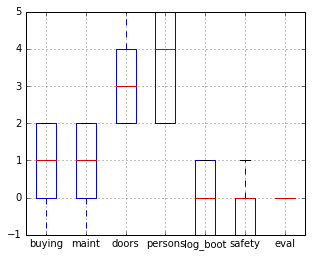

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
df_unacc.boxplot(ax=ax)
plt.show()

##### acc group

In [19]:
df_acc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.0
mean,0.424479,0.408854,3.585938,4.484375,0.101562,0.531250,1.0
std,1.041953,1.048199,1.094925,0.500408,0.799868,0.499674,0.0
min,-1.000000,-1.000000,2.000000,4.000000,-1.000000,0.000000,1.0
25%,0.000000,0.000000,3.000000,4.000000,-1.000000,0.000000,1.0
50%,0.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.0
75%,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.0
max,2.000000,2.000000,5.000000,5.000000,1.000000,1.000000,1.0


C:\Users\Yun\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


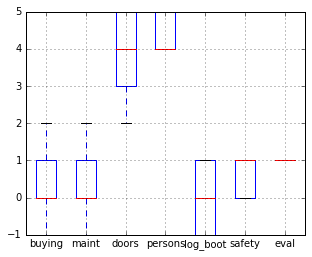

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
df_acc.boxplot(ax=ax)
plt.show()

##### good group

In [21]:
df_good.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,-0.666667,-0.666667,3.565217,4.478261,0.043478,0.434783,2.0
std,0.474858,0.474858,1.104513,0.503187,0.812309,0.499360,0.0
min,-1.000000,-1.000000,2.000000,4.000000,-1.000000,0.000000,2.0
25%,-1.000000,-1.000000,3.000000,4.000000,-1.000000,0.000000,2.0
50%,-1.000000,-1.000000,4.000000,4.000000,0.000000,0.000000,2.0
75%,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000,2.0
max,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000,2.0


C:\Users\Yun\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


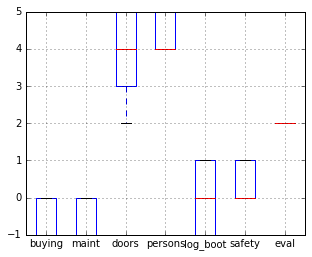

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
df_good.boxplot(ax=ax)
plt.show()

##### vgood group

In [23]:
df_vgood.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.0,65.0
mean,-0.60000,-0.200000,3.769231,4.538462,0.615385,1.0,3.0
std,0.49371,0.754155,1.057255,0.502398,0.490290,0.0,0.0
min,-1.00000,-1.000000,2.000000,4.000000,0.000000,1.0,3.0
25%,-1.00000,-1.000000,3.000000,4.000000,0.000000,1.0,3.0
50%,-1.00000,0.000000,4.000000,5.000000,1.000000,1.0,3.0
75%,0.00000,0.000000,5.000000,5.000000,1.000000,1.0,3.0
max,0.00000,1.000000,5.000000,5.000000,1.000000,1.0,3.0


C:\Users\Yun\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


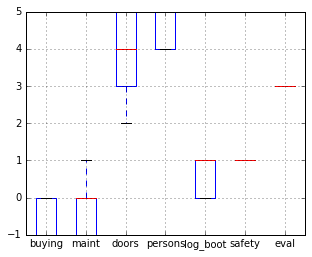

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
df_vgood.boxplot(ax=ax)
plt.show()

## Mission 3

### 각 속성들을 두개씩 쌍지어 각 쌍마다 Scatter Plot 그리기

쌍쌍이 지어 총 15쌍의 option 설정

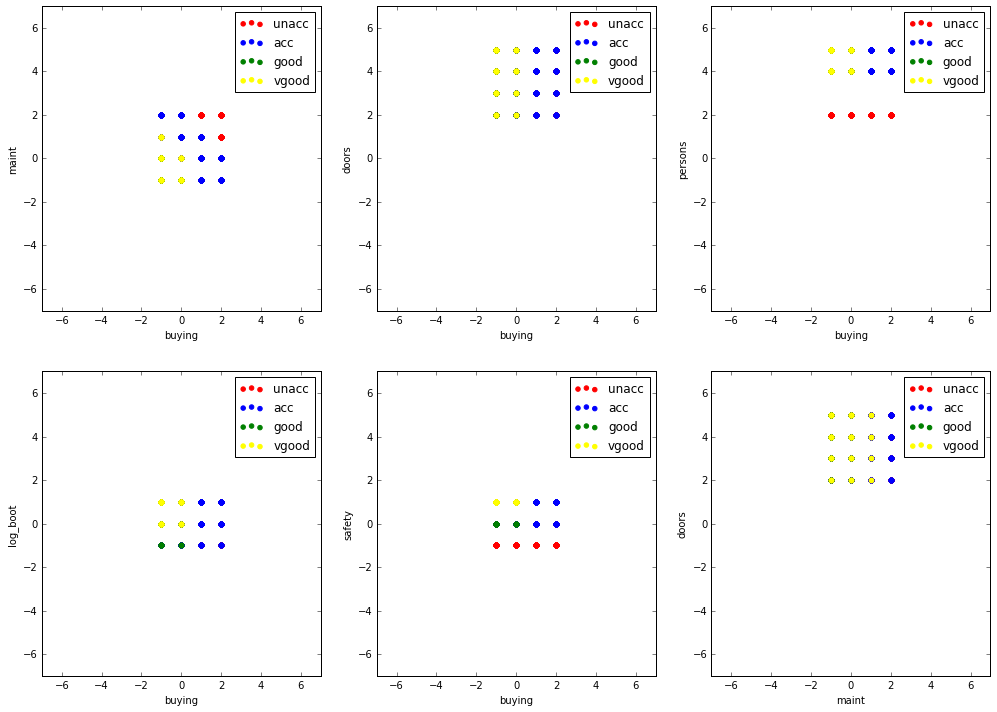

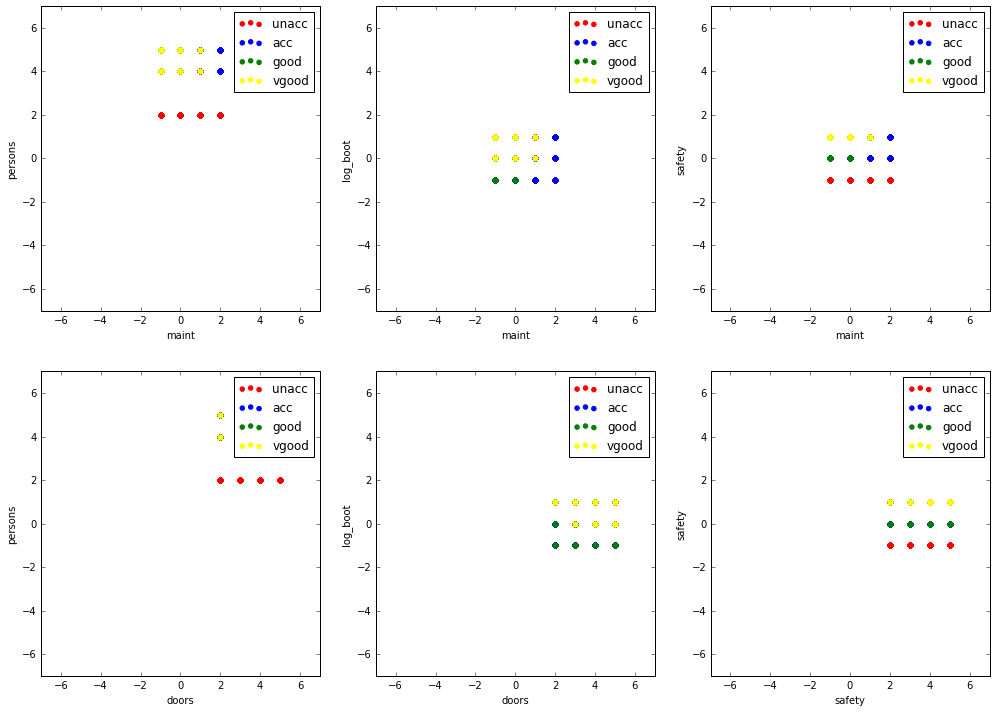

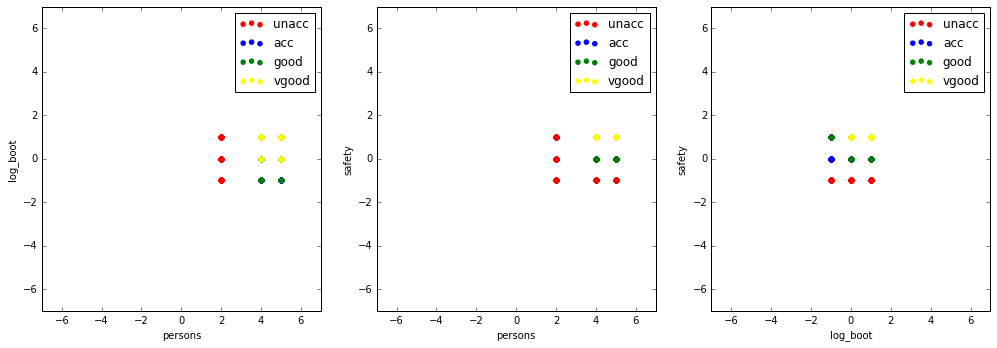

In [25]:
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0],
        'label_y': feature_names[1],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
     1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0],
        'label_y': feature_names[2],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    2 : {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0],
        'label_y': feature_names[3],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    3: {
        'data_x': feature_names[0],
        'data_y': feature_names[4],
        'label_x': feature_names[0],
        'label_y': feature_names[4],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    4: {
        'data_x': feature_names[0],
        'data_y': feature_names[5],
        'label_x': feature_names[0],
        'label_y': feature_names[5],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    5: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1],
        'label_y': feature_names[2],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    6: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1],
        'label_y': feature_names[3],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    
    7: {
        'data_x': feature_names[1],
        'data_y': feature_names[4],
        'label_x': feature_names[1],
        'label_y': feature_names[4],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    
    8: {
        'data_x': feature_names[1],
        'data_y': feature_names[5],
        'label_x': feature_names[1],
        'label_y': feature_names[5],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    9: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2],
        'label_y': feature_names[3],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    10: {
        'data_x': feature_names[2],
        'data_y': feature_names[4],
        'label_x': feature_names[2],
        'label_y': feature_names[4],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    11: {
        'data_x': feature_names[2],
        'data_y': feature_names[5],
        'label_x': feature_names[5],
        'label_y': feature_names[5],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    12: {
        'data_x': feature_names[3],
        'data_y': feature_names[4],
        'label_x': feature_names[3],
        'label_y': feature_names[4],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    13: {
        'data_x': feature_names[3],
        'data_y': feature_names[5],
        'label_x': feature_names[3],
        'label_y': feature_names[5],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    },
    
    14: {
        'data_x': feature_names[4],
        'data_y': feature_names[5],
        'label_x': feature_names[4],
        'label_y': feature_names[5],
        'xlim_min': -7,
        'xlim_max': 7,
        'ylim_min': -7,
        'ylim_max': 7
    }
}
ax = []
fig1 = plt.figure(figsize=(17,12))
fig2 = plt.figure(figsize=(17,12))
fig3 = plt.figure(figsize=(17,12))
for i in range(0,6):
    ax.append(fig1.add_subplot(230 + (i+1)))
for i in range(0,6):
    ax.append(fig2.add_subplot(230 + (i+1)))   
for i in range(0,3):
    ax.append(fig3.add_subplot(230 + (i+1)))
    
    
for i in range(0,15) :
    unacc = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color='red')
    acc = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color='blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color='green')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color='yellow')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_xlim([options[i]['xlim_min'], options[i]['xlim_max']])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc,acc,good,vgood),('unacc','acc','good','vgood'))

figure 하나당 최대 6개까지의 plot이 들어갈 수 있어 3개의 fig를 선언해서 append

#### Plot 분석

1) buying 
  - plot 1,2,3,4,5를 보았을 때 구매가격이 높을수록 대체적으로 종합 평가가 낮게 나오는것을 확인할 수 있음, 반비례 관계로 나타남
  
2) maint
  - plot 1,6,7,8,9를 보았을 때 유지비용이 높을수록 대체적으로 종합 평가가 낮게 나오는 것을 확인할 수 있음, 반비례 관계로 나타남
  
3) doors
 - plot 2,6,10,11,12를 보았을 떄 문의 개수는 종합 평가에 거의 영향을 미치지 않는것을 볼 수 있음
 
4) persons
 - plot 3,7,10,13,14를 보면 2명이 탑승자일 경우에 평가가 안좋고, 그 외의 경우에는 크게 영향을 주지 않는것을 확인할 수 있음
 
5) lug_boot
 - plot 4,8,11,13,15를 보면 짐트럭이 small일 경우에 평가가 좋지 않고, 그 외의 경우에는 거의 영향을 주지 않는것을 확인할 수 있음
 
6) safety
 - plot 5,9,12,14,15를 보았을 때 safety 수치는 종합 평가에 크게 영향을 미치며 safety 수치가 높을수록 평가가 좋게 나오는 비례 관계로 나타남

## Mission 4

### 전체 데이터 집합에 대한 Entropy 산출

In [41]:
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)
    if n_labels <= 1:
        return 0
    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)
    
    if n_classes <= 1:
        return 0

    entropy = 0.

    # Compute standard entropy.
    for i in probs:
        #entropy 계산식
        entropy -= i * log(i,2)
    
    return entropy

In [139]:
df[target_name].values

array([0, 0, 0, ..., 0, 2, 3], dtype=int64)

In [140]:
entropy(df[target_name].values)

1.2057409700121753

## Mission 5

### 루트노드에서 첫 번째 Branch를 위한 IG가 가장 높은 속성 산출

In [43]:
parent_size = float(len(df))
parent_size

1728.0

IG 계산을 위한 df_per_attr 지정

In [138]:
df_per_attr = {}
# 0~6 target_value 제외
for i in range(0, df.shape[1]-1):
    df_per_attr[i] = {}
    groupby_df = df[[target_name, feature_names[i]]].groupby(feature_names[i]) #target_value와 연관된 subset
    df_per_attr[i]['num_groups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(df_per_attr[i]['num_groups']):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])


각 attribute별로 IG 계산

In [144]:
for i in range(0, df.shape[1]-1):#Target Attribute가 포함되어 있기 때문에 1개 빼줌
    sub_sum_entropy = 0.0
    print i
    for j in range(df_per_attr[i]['num_groups']):
        sub_size = len(df_per_attr[i]['subgroups'][j])
        sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
        print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
        sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
    ig = entropy(df[target_name].values) - sub_sum_entropy
    df_per_attr[i]['information_gain'] = ig
    print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df[target_name].values), sub_sum_entropy, ig)
    print

0
0.25 * 1.4049 = 0.3512
0.25 * 0.8113 = 0.2028
0.25 * 0.6500 = 0.1625
0.25 * 1.5710 = 0.3927
Information Gain: 1.2057 - 1.1093 = 0.0964

1
0.25 * 1.4049 = 0.3512
0.25 * 0.9826 = 0.2457
0.25 * 0.6500 = 0.1625
0.25 * 1.4906 = 0.3726
Information Gain: 1.2057 - 1.1320 = 0.0737

2
0.25 * 1.0534 = 0.2634
0.25 * 1.2118 = 0.3029
0.25 * 1.2699 = 0.3175
0.25 * 1.2699 = 0.3175
Information Gain: 1.2057 - 1.2013 = 0.0045

3
0.33 * 0.0000 = 0.0000
0.33 * 1.4807 = 0.4936
0.33 * 1.4775 = 0.4925
Information Gain: 1.2057 - 0.9861 = 0.2197

4
0.33 * 1.2559 = 0.4186
0.33 * 1.3712 = 0.4571
0.33 * 0.9001 = 0.3000
Information Gain: 1.2057 - 1.1757 = 0.0300

5
0.33 * 1.2152 = 0.4051
0.33 * 1.6155 = 0.5385
0.33 * 0.0000 = 0.0000
Information Gain: 1.2057 - 0.9436 = 0.2622



In [145]:
import operator
information_gain_dict = {}
for i in range(0, df.shape[1]-1):
    information_gain_dict[i] = df_per_attr[i]['information_gain']

information_gain_dict

{0: 0.096448969169613985,
 1: 0.073703946921485741,
 2: 0.004485716626632108,
 3: 0.2196629633399082,
 4: 0.030008141247605424,
 5: 0.26218435655426386}

In [146]:
max(information_gain_dict.iteritems(), key=operator.itemgetter(1))

(5, 0.26218435655426386)

## Mission 6

### sklearn 모듈을 활용해서 Decision Tree 모델을 구축하고 예측 시도

sklearn 모듈 사용을 위한 import

In [52]:
from sklearn import tree
from sklearn.externals.six import StringIO

Training용 데이터 셋 정리

In [153]:
featureData = df.iloc[:,0:df.shape[1]-1]

In [155]:
featureEvalData = featureData.values

In [156]:
featureEvalData

array([[ 2,  2,  2,  2, -1, -1],
       [ 2,  2,  2,  2, -1,  0],
       [ 2,  2,  2,  2, -1,  1],
       ..., 
       [-1, -1,  5,  5,  1, -1],
       [-1, -1,  5,  5,  1,  0],
       [-1, -1,  5,  5,  1,  1]], dtype=int64)

In [157]:
targetData = df.iloc[:,df.shape[1]-1]

In [158]:
targetEvalData = targetData.values

In [159]:
targetEvalData

array([0, 0, 0, ..., 0, 2, 3], dtype=int64)

In [160]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(featureEvalData, targetEvalData)

In [161]:
with open("car.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f)

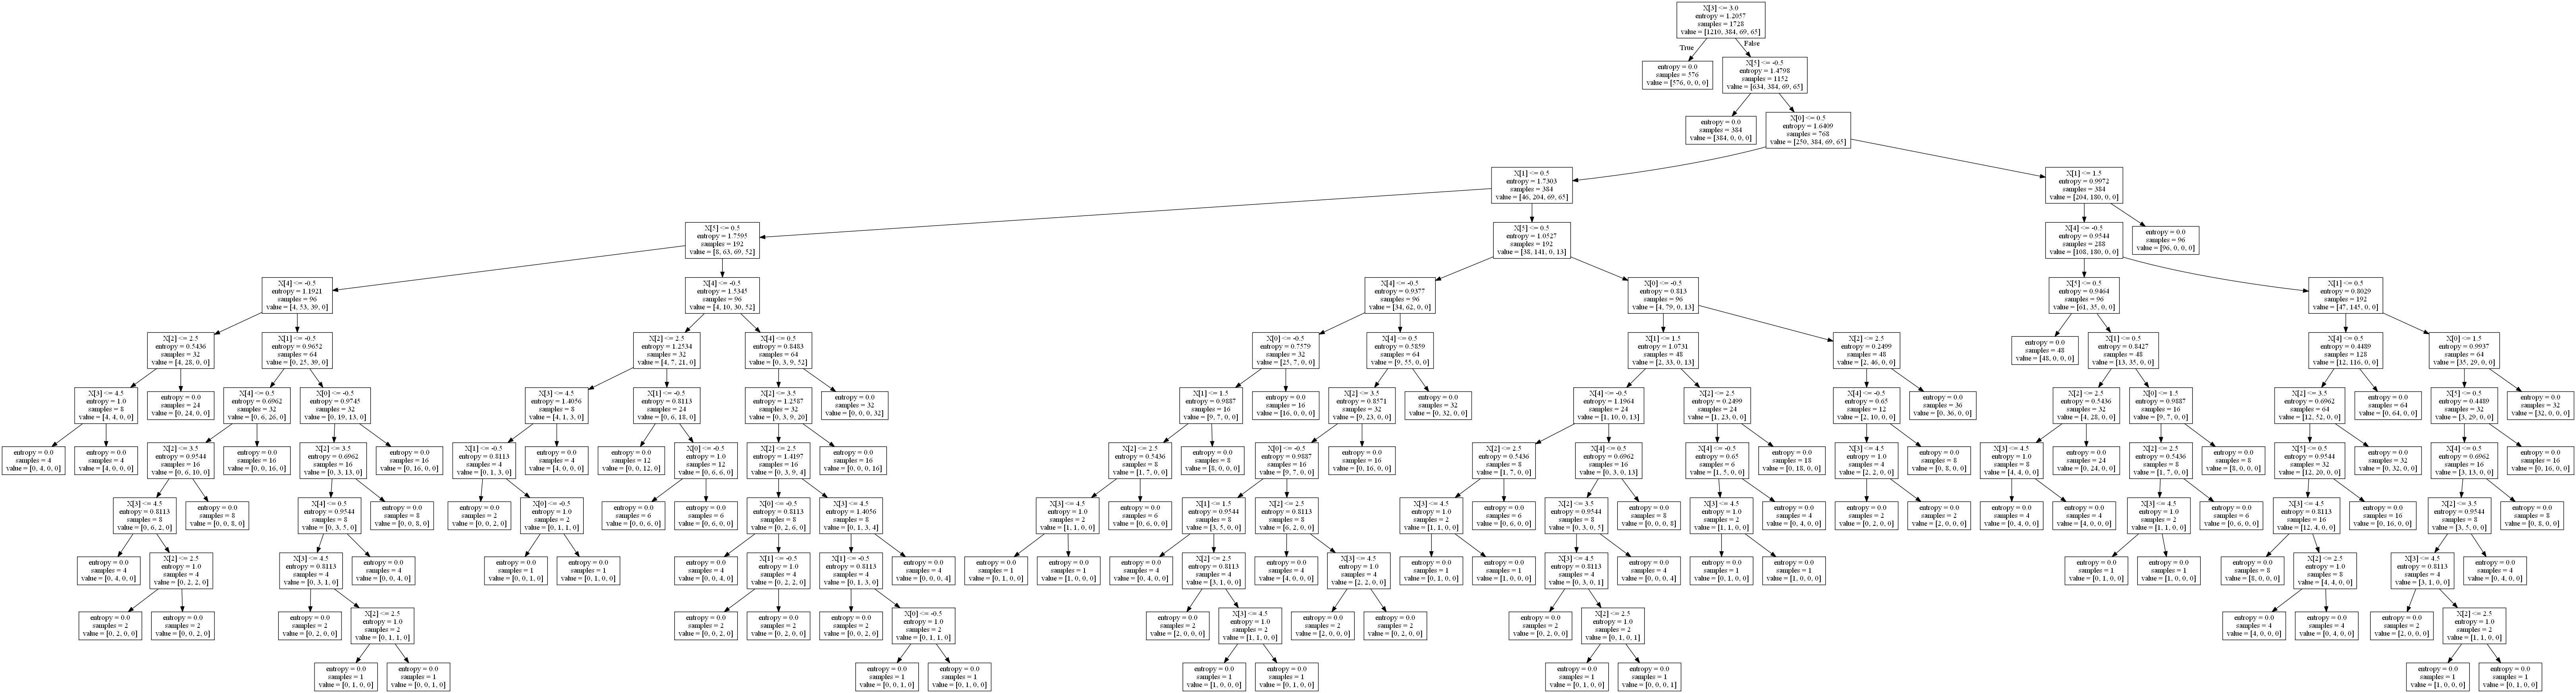

In [152]:
from IPython.display import Image
Image("car.jpg")

첫 Entropy가 1.2057인데 이는 Mission3에서 계산한 값과 동일(소수점 이하 버림)

Mission5의 IG가 큰 순서대로 배정된것 또한 확인 가능

In [162]:
test = df[[0,1,2,3,4,5]]

training data를 통한 예측

In [163]:
clf.predict(test[1600:1700])

array([0, 0, 0, 1, 2, 0, 2, 3, 0, 2, 3, 0, 1, 2, 0, 2, 3, 0, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 3, 0, 0, 0, 0, 1, 2, 0, 2,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 3, 0, 1, 2, 0,
       2, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 3, 0, 2, 3,
       0, 1, 2, 0, 2, 3, 0, 2], dtype=int64)

임의의 data를 통한 예측

In [164]:
clf.predict([2,-1,2,5,0,1])

C:\Users\Yun\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int64)